<a href="https://colab.research.google.com/github/atakhan27/Data-Science/blob/main/HW7_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (30 Points)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at 

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv"
df = pd.read_csv(url)
df

,V1,V2,V3,V4,V5,V6
0,7.0,3.0,6.0,4.0,2.0,4.0
1,1.0,3.0,2.0,4.0,5.0,4.0
2,6.0,2.0,7.0,4.0,1.0,3.0
3,4.0,5.0,4.0,6.0,6.0,5.0
4,1.0,2.0,2.0,3.0,2.0,2.0
5,6.0,3.0,6.0,4.0,4.0,4.0
6,5.0,3.0,6.0,3.0,1.0,3.0
7,6.0,4.0,7.0,4.0,6.0,4.0
8,3.0,4.0,2.0,3.0,7.0,3.0
9,2.0,6.0,2.0,6.0,2.0,6.0


In [2]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()
principal_components = pca.fit_transform(scaled_data)

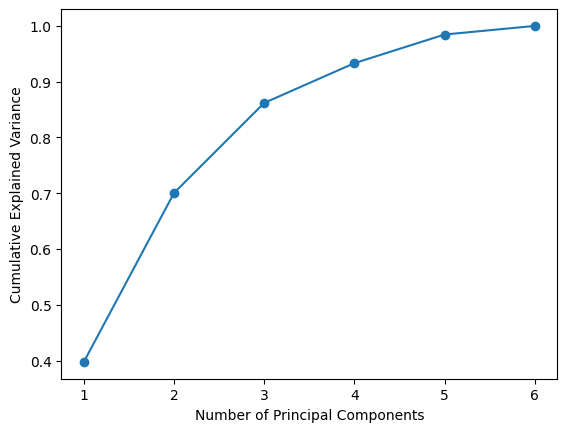

In [3]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [4]:
selected_components = 3
total_variance_explained = np.sum(explained_variance[:selected_components]) * 100

In [5]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6'], index=df.columns)
print(df_loadings)

         PC1       PC2       PC3       PC4       PC5       PC6
V1 -0.300180 -0.614344 -0.183474 -0.105313  0.277200  0.640999
V2  0.503715 -0.263534 -0.084629  0.695009  0.418370 -0.107646
V3 -0.363633 -0.570766 -0.194627  0.038606 -0.200211 -0.680105
V4  0.526215 -0.210514 -0.044580 -0.709880  0.344015 -0.233493
V5  0.158218  0.195328 -0.940028 -0.012959 -0.214732  0.082966
V6  0.471167 -0.380642  0.188827  0.016849 -0.737283  0.231489


In [6]:
#Q2
import pandas as pd
breast_dataset=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Bcancer.csv')
breast_dataset
y=breast_dataset['label']
X=breast_dataset.drop(['label'], axis = 1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Q2) (70 points)Using breast cancer data above, 

(1) split the data two : training (65%) and testing (35%)

(2) Using logistic regression model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(3)Using knn model in train data(choose k based on CV), get the performance metric on test data(accuracy,recall, precision confusuion matrix). What is the k value chosen based on k?

(4)Using naive  model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(5)Using SVM with parameter tuning(you can use optuna) in train data ,get the performance metric on test data(accuracy,recall, precision confusuion matrix)

In [16]:
!pip install pandas scikit-learn optuna

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import optuna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [9]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_log)
print("Recall:", recall_log)
print("Precision:", precision_log)
print("Confusion Matrix:")
print(confusion_matrix_log)

Logistic Regression Metrics:
Accuracy: 0.965
Recall: 0.9689922480620154
Precision: 0.9765625
Confusion Matrix:
[[ 68   3]
 [  4 125]]


In [10]:
k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred_knn = knn_best.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Metrics (k = {}):".format(best_k))
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Precision:", precision_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)

KNN Metrics (k = 12):
Accuracy: 0.975
Recall: 0.9844961240310077
Precision: 0.9769230769230769
Confusion Matrix:
[[ 68   3]
 [  2 127]]


In [11]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred_naive = naive_bayes.predict(X_test)

accuracy_naive = accuracy_score(y_test, y_pred_naive)
recall_naive = recall_score(y_test, y_pred_naive)
precision_naive = precision_score(y_test, y_pred_naive)
confusion_matrix_naive = confusion_matrix(y_test, y_pred_naive)

print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_naive)
print("Recall:", recall_naive)
print("Precision:", precision_naive)
print("Confusion Matrix:")
print(confusion_matrix_naive)

Naive Bayes Metrics:
Accuracy: 0.95
Recall: 0.9689922480620154
Precision: 0.9541984732824428
Confusion Matrix:
[[ 65   6]
 [  4 125]]


In [16]:
def objective(trial):
    C = trial.suggest_loguniform("C", 1e-1, 1e1)
    gamma = trial.suggest_loguniform("gamma", 1e-1, 1e1)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])

    svm = SVC(C=C, gamma=gamma, kernel=kernel)
    return cross_val_score(svm, X_train, y_train, cv=2, n_jobs=-1).mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

best_params = study.best_params

svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

y_pred_svm = svm_best.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [16]:
print("SVM Metrics (Optuna-tuned parameters):")
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)

SVM Metrics (Optuna-tuned parameters):
Accuracy: 0.95
Recall: 0.9689922480620154
Precision: 0.9541984732824428
Confusion Matrix:
[[ 65   6]
 [  4 125]]
